# Logistic Regression + Model Interpretability Demo

## Connect to Google Drive Locally

First, let's connect to Google Drive to access our dataset.

In [ ]:
# For Google Colab:
from google.colab import drive
drive.mount('/content/drive')

# For local Jupyter notebooks, you would typically access files directly
# from your local filesystem. This section would be adapted based on your
# specific setup and where your data files are stored.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries

Let's import the necessary libraries for our analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
# import warnings
# warnings.filterwarnings('ignore')

# Set plot style
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
# read from
path = '/content/drive/MyDrive/Colab/Datasets/telco-customer-churn.csv'
# path = '/data/telco-customer-churn.csv'
df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (7043, 21)

First few rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [ ]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float')
df.reset_index(drop=True, inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

## Exploratory Data Analysis (EDA)

Let's explore the dataset to understand its structure and characteristics.

In [ ]:
# Basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-n

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


## Categorical Feature Analysis

Overall target mean: 26.58%


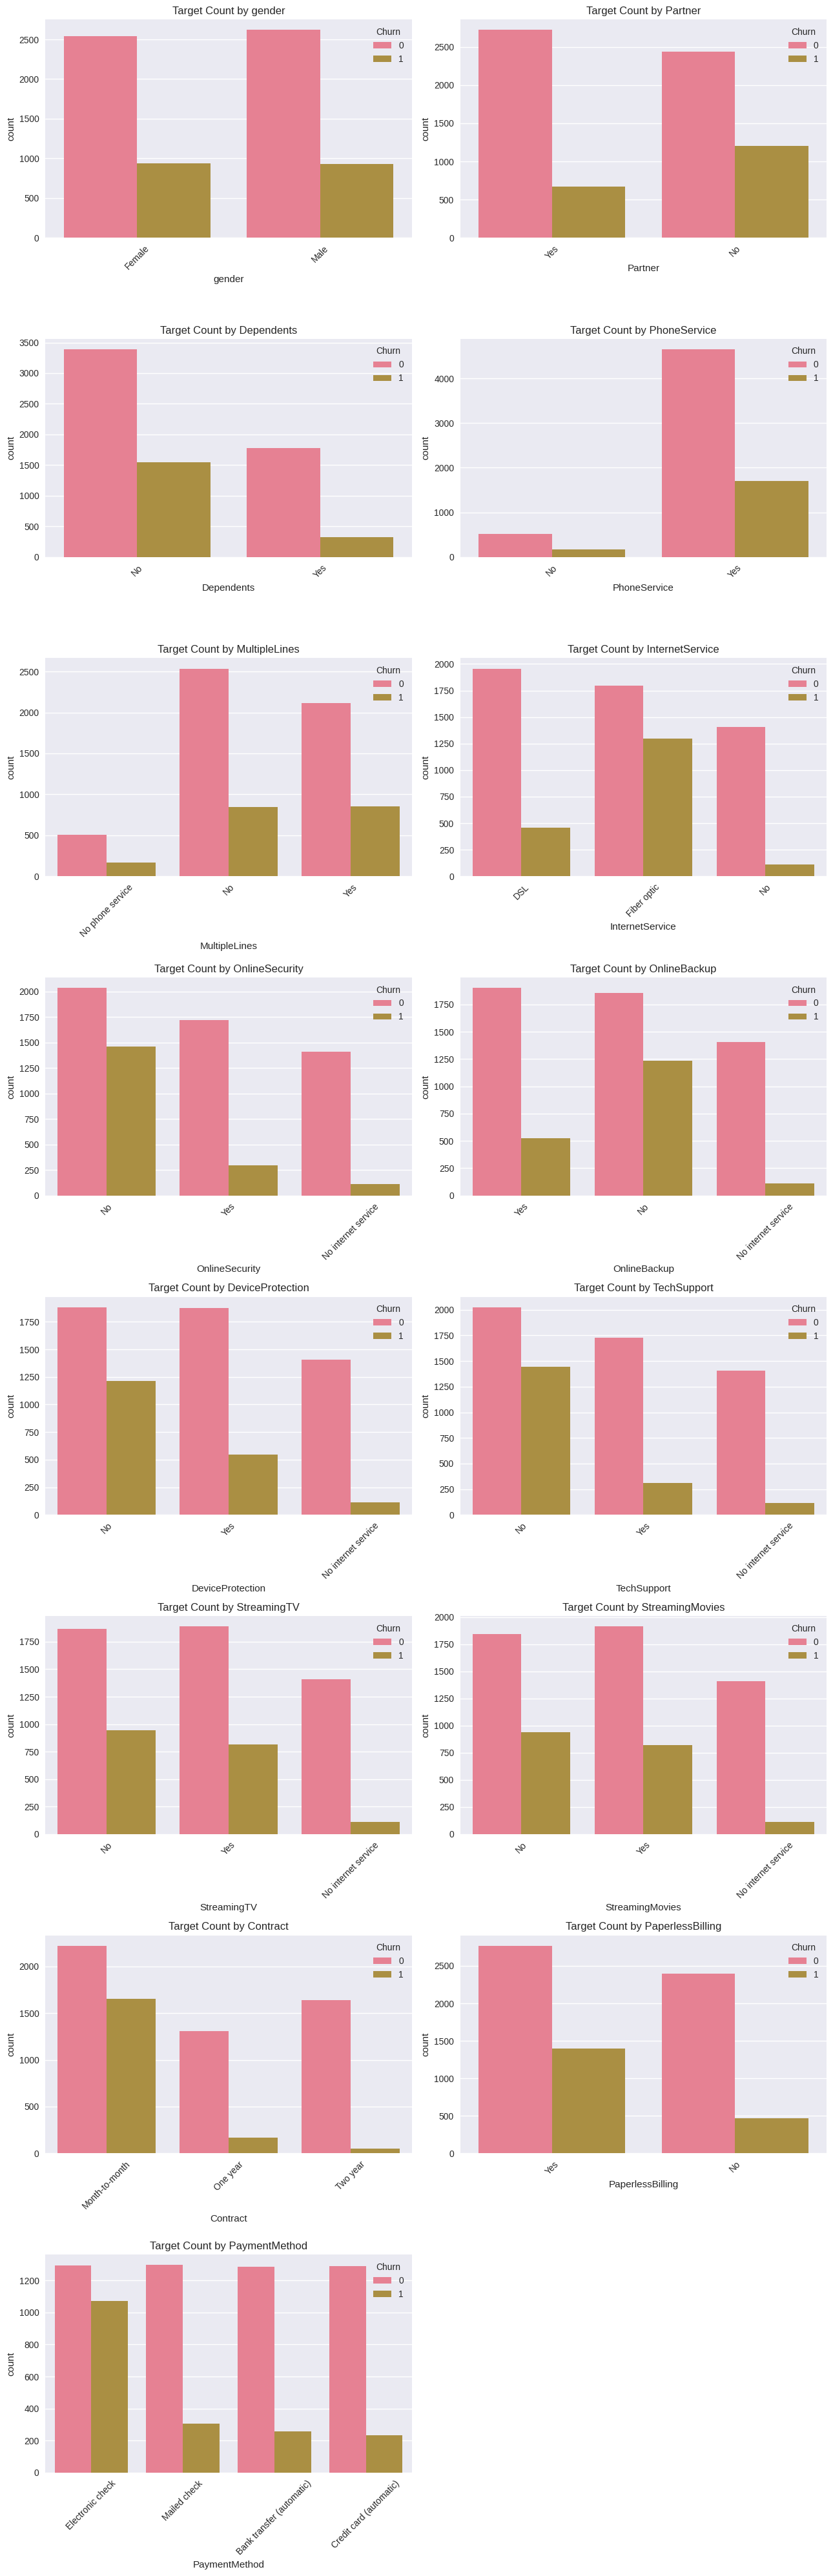

In [ ]:
# Mean target
target = 'Churn'
mean_target = df[target].mean()
print(f"Overall target mean: {mean_target:.2%}")


# Number of plots and grid shape
cols_to_remove = ['customerID']
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
filtered_cols = [item for item in cat_cols if item not in cols_to_remove]
n = len(filtered_cols)
cols = 2
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6.5, rows * 5))
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(filtered_cols):
    sns.countplot(data=df, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f'Target Count by {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

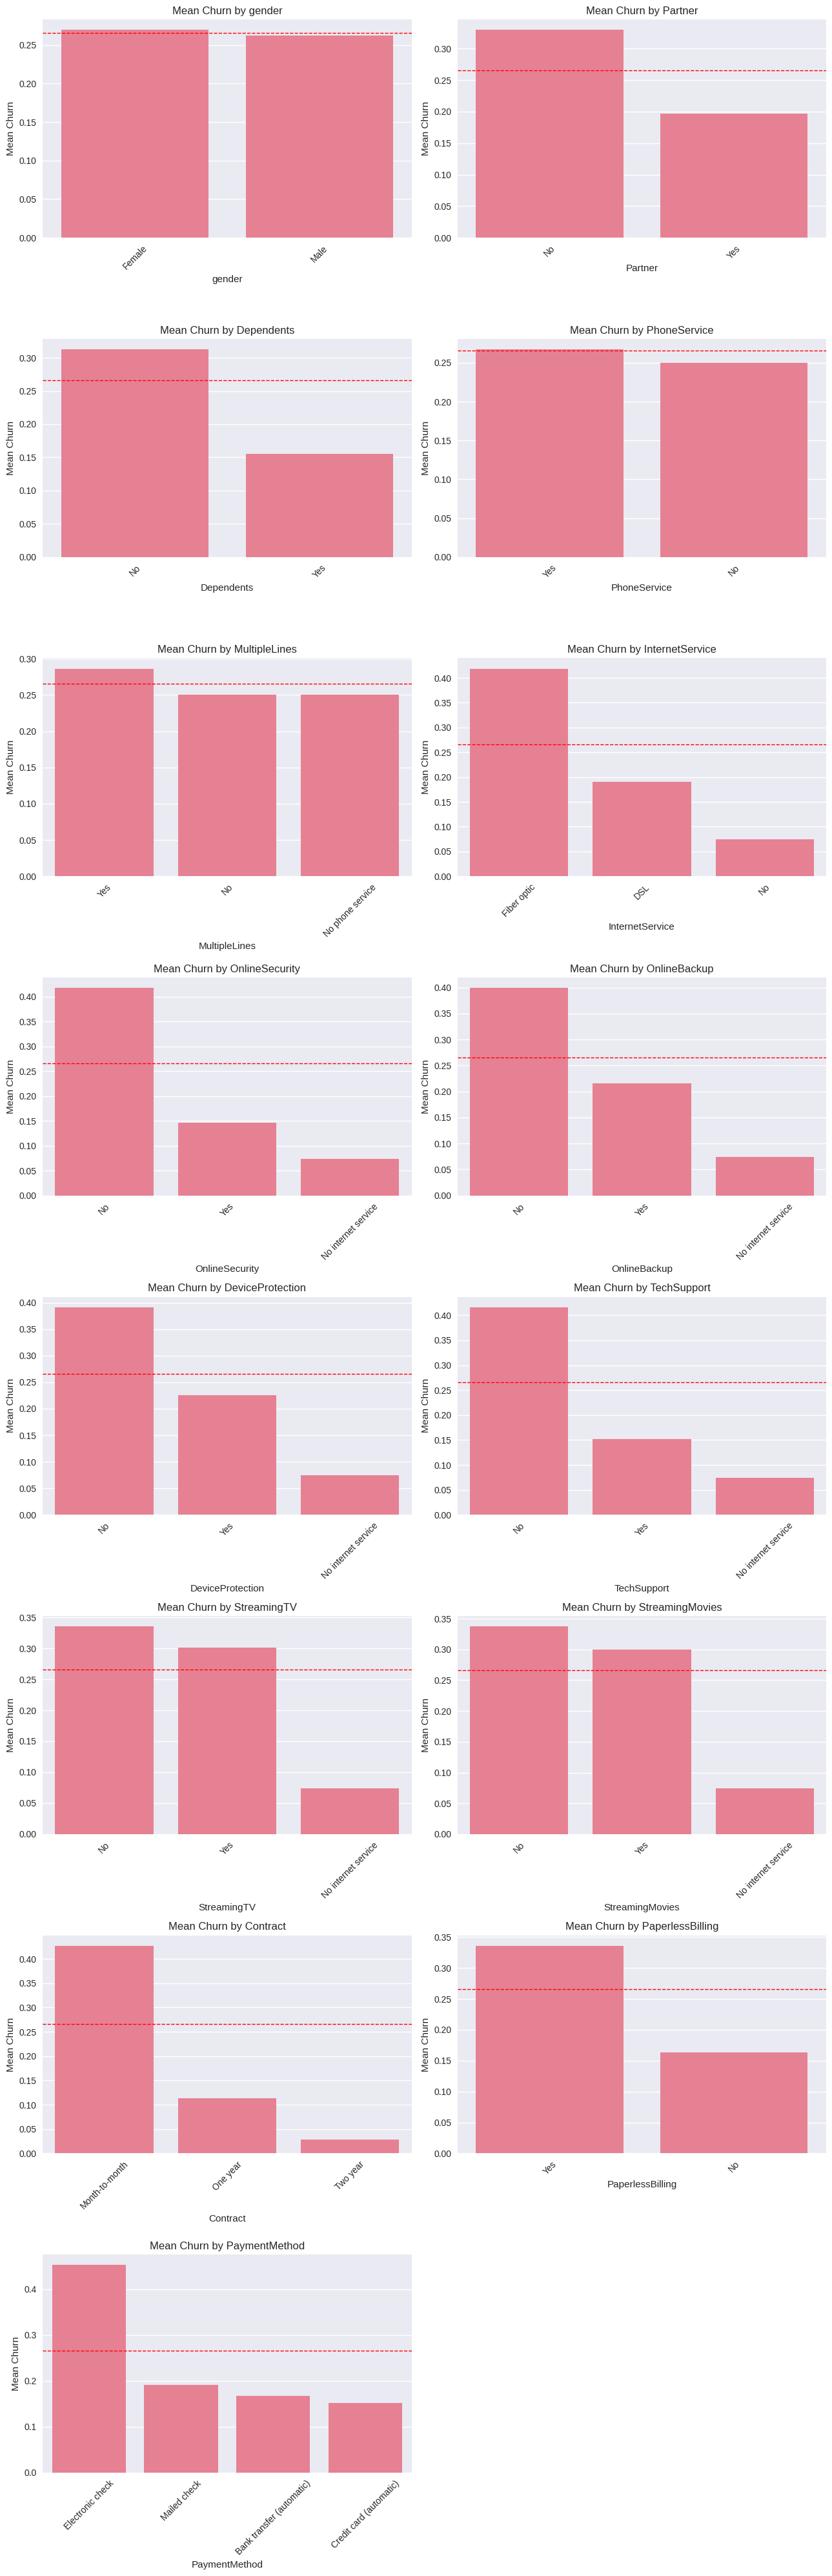

In [ ]:
# plot mean target across all categorical variables
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6.5, rows * 5))
axes = axes.flatten()

# Plot mean target for each category
for i, col in enumerate(filtered_cols):
    # Calculate mean target per category
    grouped = df.groupby(col)[target].mean().reset_index()

    # Sort categories by mean value (optional for clarity)
    grouped = grouped.sort_values(by=target, ascending=False)

    sns.barplot(data=grouped, x=col, y=target, ax=axes[i])
    axes[i].set_title(f'Mean {target} by {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].axhline(mean_target, color='red', linestyle='--', linewidth=1)
    axes[i].set_ylabel(f'Mean {target}')
    axes[i].set_xlabel(col)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Numeric Feature Analysis

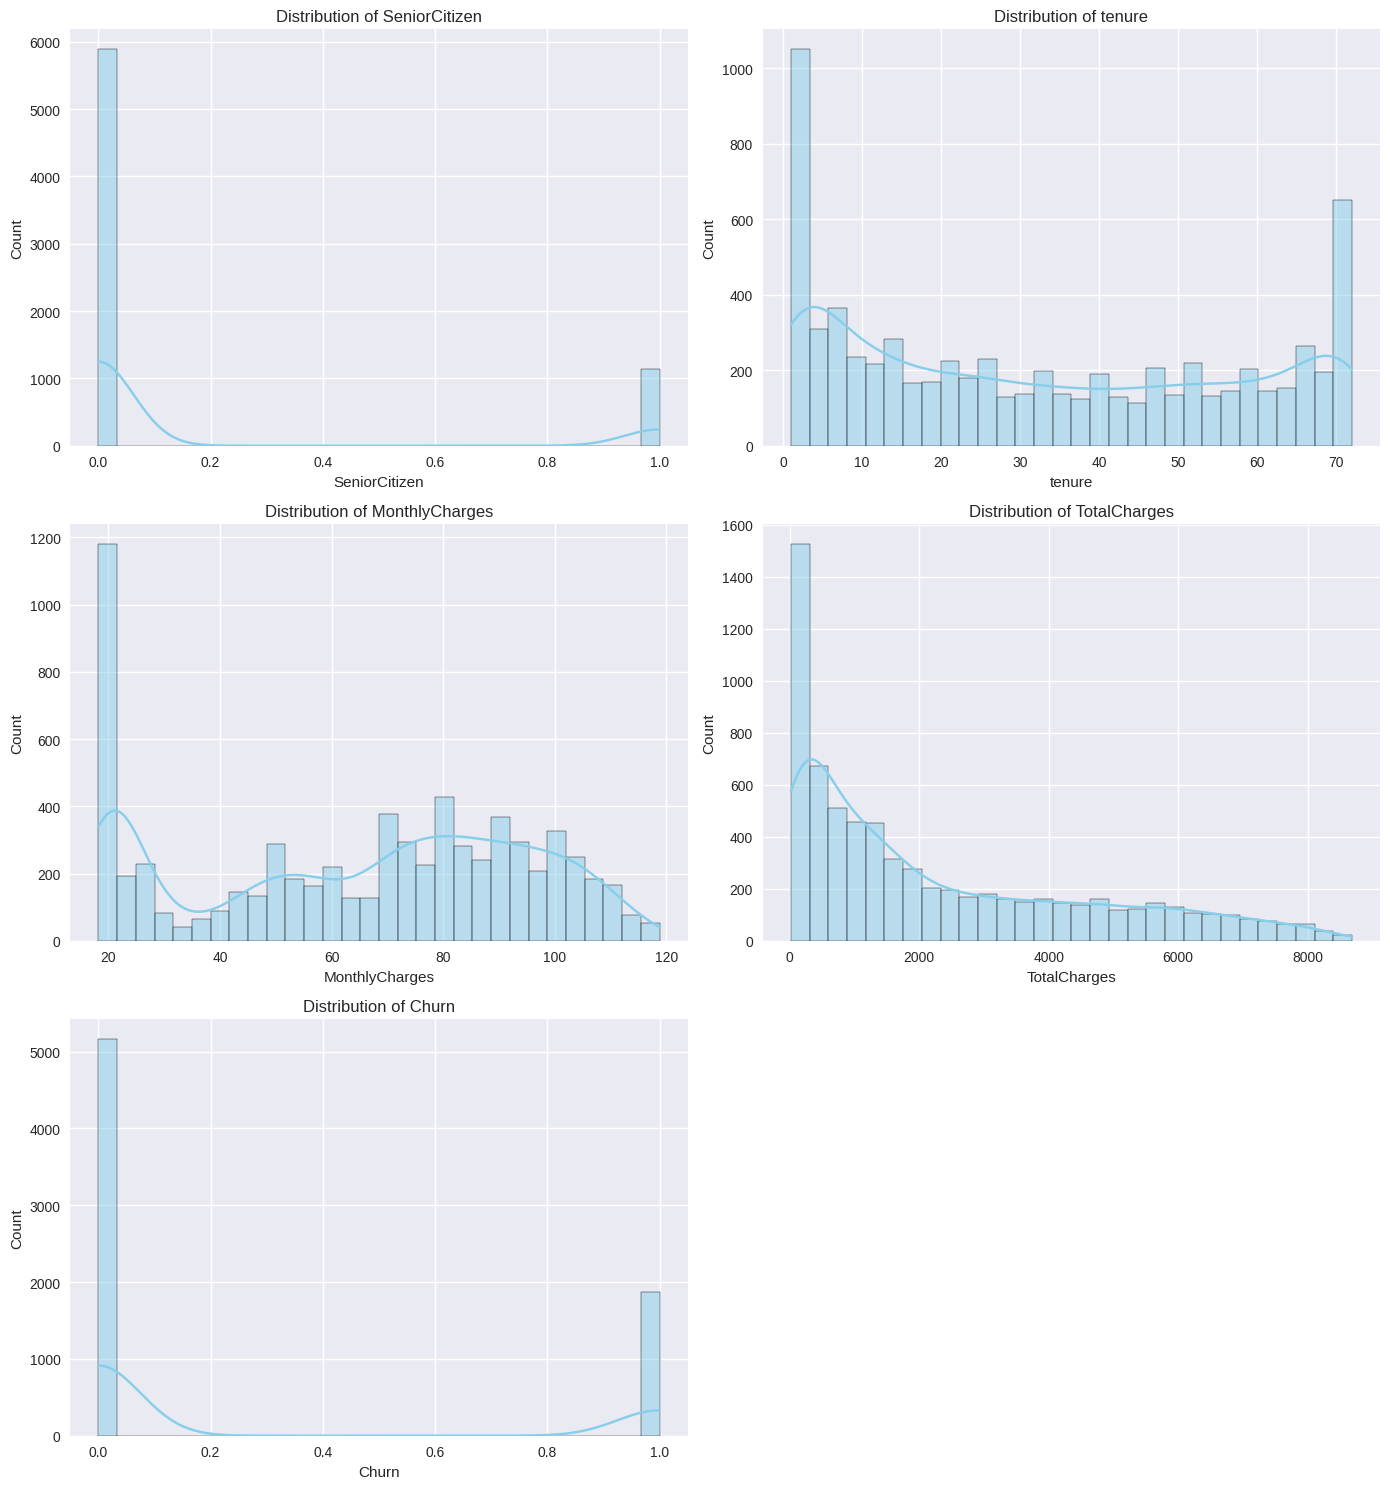

In [ ]:
# # Optional: columns to exclude
# cols_to_remove = ['customerID', 'some_other_column']  # <-- adjust as needed

# Select numeric features
num_cols = df.select_dtypes(include='number').columns.tolist()
filtered_cols = [col for col in num_cols if col not in cols_to_remove]

# Subplot layout
n = len(filtered_cols)
cols = 2
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 5))
axes = axes.flatten()

# Plot each numeric feature with KDE
for i, col in enumerate(filtered_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)

# Remove unused axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

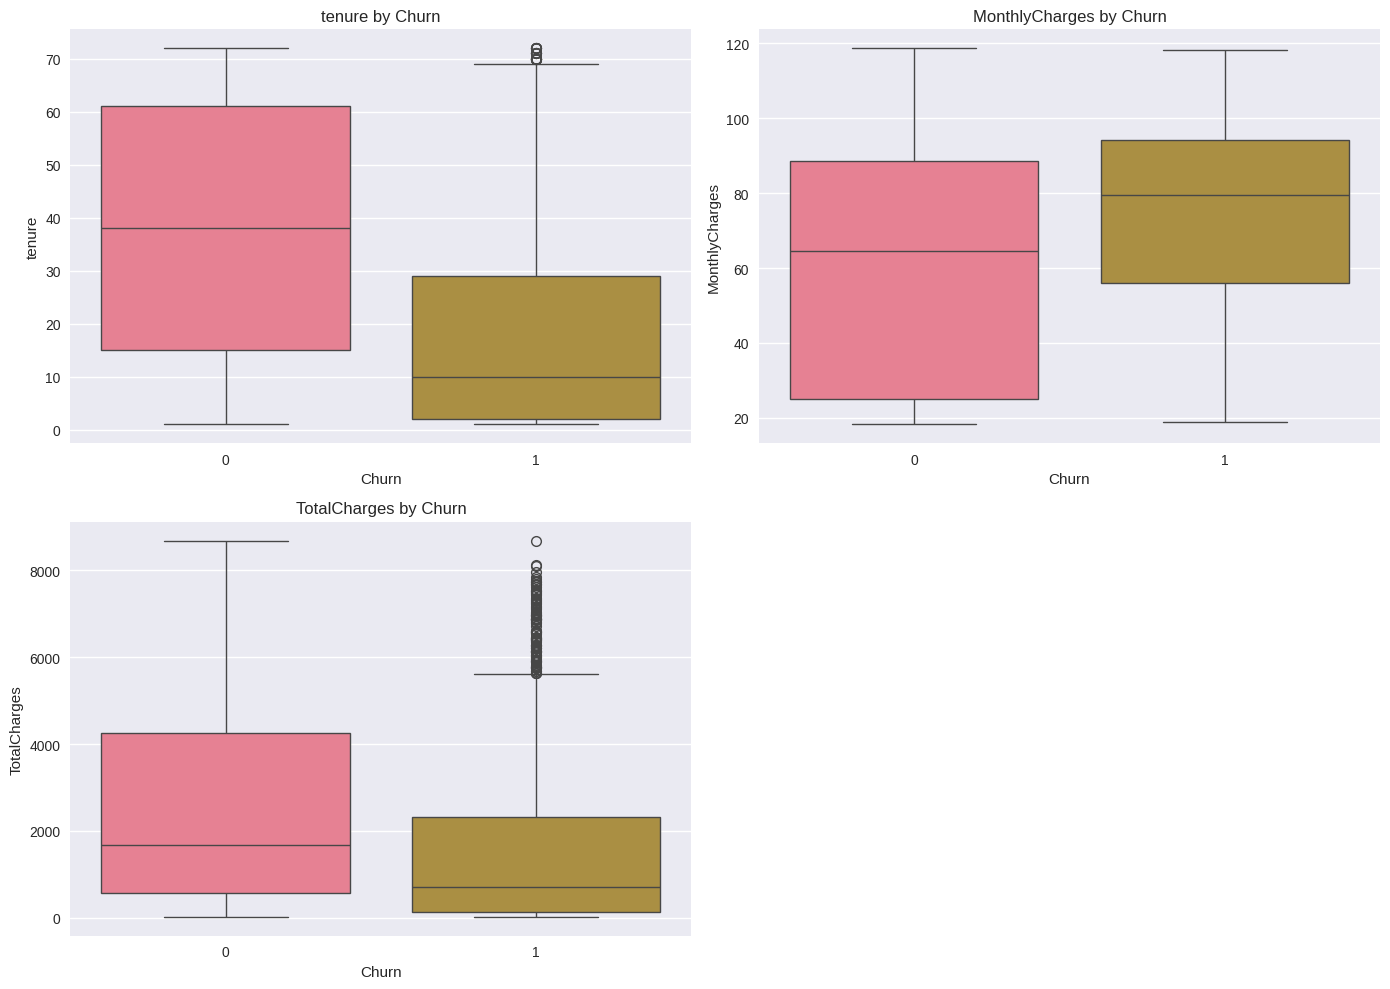

In [ ]:
# Define your target variable
target = 'Churn'  # Replace with your actual target name

# Optional: columns to exclude
cols_to_remove = ['Churn', 'SeniorCitizen']  # Customize this list

# Select numeric features (and remove excluded ones)
num_cols = df.select_dtypes(include='number').columns.tolist()
filtered_cols = [col for col in num_cols if col not in cols_to_remove]

# Subplot layout
n = len(filtered_cols)
cols = 2
rows = math.ceil(n / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 5))
axes = axes.flatten()

# Plot each numeric feature as a boxplot
for i, col in enumerate(filtered_cols):
    sns.boxplot(data=df, x=target, y=col, ax=axes[i], hue=target, legend=False)
    axes[i].set_title(f'{col} by {target}')
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(col)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

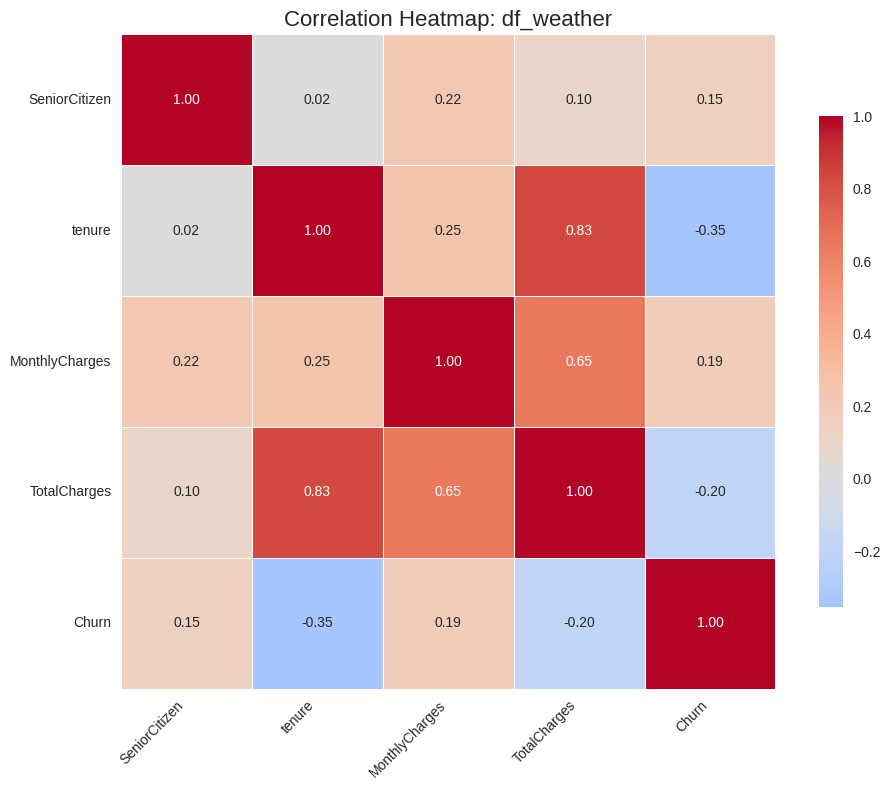

In [ ]:
# correlation matrix
corr_matrix = df.corr(numeric_only=True)  # Use numeric_only=True for pandas >=1.5

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # Show correlation coefficients
    cmap='coolwarm',  # Color map
    center=0,         # Center the colormap at zero
    fmt=".2f",        # Format the numbers to 2 decimal places
    square=True,      # Make cells square
    linewidths=0.5,   # Cell border lines
    cbar_kws={"shrink": 0.75}  # Shrink color bar
)
plt.title("Correlation Heatmap: df_weather", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Data Overview

Categorical (2 levels):
* gender
* Partner
* Dependents
* PhoneService
* PaperlessBilling

Categorical (>2 levels):
* MultipleLines
* InternetService
* OnlineSecurity
* OnlineBackup
* DeviceProtection
* TechSupport
* StreamingTV
* StreamingMovies
* Contract
* PaymentMethod

Numeric:
* SeniorCitizen
* tenure
* MonthlyCharges
* TotalCharges

Target
* Churn (Categorical - 2 levels)

---

# Logistic regression model

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook, we will compare the logistic regression implementations of `scikit-learn` and `statsmodels`.

We will evaluate:

- log-loss
- log-likelihood
- deviance
- p-value of the model
- R-statistic

These are the first steps towards understanding if the model shows a good fit to the data.

Only when the model shows a good fit can we derive meaningful interpretations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import statsmodels.api as sm

# Data Preparation

In [ ]:
# v1_cols = ['tenure', 'TotalCharges', 'MonthlyCharges', 'Contract', 'Churn']
v1_cols = ['tenure', 'TotalCharges', 'Contract', 'Churn']
df_processed_v1 = df[v1_cols]

# Let's say you want Mondayas the baseline
cat_col = 'Contract'
cat_col_levels = ['Two year', 'One year', 'Month-to-month']
df_processed_v1[cat_col] = pd.Categorical(df_processed_v1[cat_col],
    categories=cat_col_levels)

# The dropped dummy is your reference level. In this case Monday
df_processed_v1 = pd.get_dummies(df_processed_v1, columns=[cat_col], drop_first=True, dtype=int)

/tmp/ipython-input-537051716.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed_v1[cat_col] = pd.Categorical(df_processed_v1[cat_col],


In [ ]:
# Prepare data for modeling
X = df_processed_v1.drop('Churn', axis=1)
y = df_processed_v1['Churn']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((5625, 4), (1407, 4))

In [ ]:
# scale the variables
# scaler = MinMaxScaler().set_output(transform="pandas")
scaler = StandardScaler().set_output(transform="pandas")

numeric_cols = ['tenure', 'TotalCharges']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# display top 5 rows
X_train.head()

,tenure,TotalCharges,Contract_One year,Contract_Month-to-month
6021,0.434674,-0.087908,0,1
3404,-1.195652,-0.921285,0,1
5474,0.923772,0.963781,0,1
5515,0.516190,0.122920,0,0
6328,0.923772,1.401088,1,0


# Statsmodels

In [ ]:
# Our model needs an intercept so we add a column of 1s:

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
X_train_sm.head()

,const,tenure,TotalCharges,Contract_One year,Contract_Month-to-month
6021,1.0,0.434674,-0.087908,0,1
3404,1.0,-1.195652,-0.921285,0,1
5474,1.0,0.923772,0.963781,0,1
5515,1.0,0.516190,0.122920,0,0
6328,1.0,0.923772,1.401088,1,0


In [ ]:
# Fit logistic regression model

logit_mod = sm.Logit(y_train, X_train_sm)
logit_res = logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.448371
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5620
Method:                           MLE   Df Model:                            4
Date:                Fri, 29 Aug 2025   Pseudo R-squ.:                  0.2256
Time:                        00:50:51   Log-Likelihood:                -2522.1
converged:                       True   LL-Null:                       -3257.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -3.3808      0.180    -18.791      0.000      -3.733   

**Note**: It is important to one hot encode into k-1 for logistic regression, otherwise the Logit from statsmodels will raise a convergence error, due to data redundancy.

In [ ]:
# obtain predictions

pred_train = logit_res.get_prediction(X_train_sm).summary_frame()["predicted"]
pred_test = logit_res.get_prediction(X_test_sm).summary_frame()["predicted"]

In [ ]:
pred_train.shape, pred_test.shape

((5625,), (1407,))

In [ ]:
print(f"Accuracy in train set: {accuracy_score(y_train, pred_train>0.5)}")
print(f"Accuracy in test set: {accuracy_score(y_test, pred_test>0.5)}")

Accuracy in train set: 0.7786666666666666
Accuracy in test set: 0.7725657427149965


The p-value of the model is significant, the LL of the model is smaller than the baseline, and some of the coefficients also show significant p-values (more on this later). That means that we have a decent linear model.

We can now make global and local interpretations ==> Later in this course!

## Scikit-learn

Sklearn does not output all the statistics that we need out of the box, so we need to calculate them manually.

Let's see how to do that.

---

In [ ]:
# fit model

# important to remove the penalty for unregularized regression.
logit = LogisticRegression(penalty=None, random_state=1)

logit.fit(X_train, y_train)

LogisticRegression(penalty=None, random_state=1)

In [ ]:
# Check Accuracy

print(logit.score(X_train, y_train))
print(logit.score(X_test, y_test))

0.7786666666666666
0.7725657427149965


In [ ]:
# check coefficients
pd.Series(logit.coef_[0], index=logit.feature_names_in_)

,0
tenure,-2.344349
TotalCharges,1.948035
Contract_One year,1.123221
Contract_Month-to-month,2.460447


### Evaluate the model

We need to calculate all of these statistics manually.


- log-loss
- log-likelihood
- deviance
- p-value of the model
- R-statistic

In [ ]:
# baseline model: mean of the target

base_preds = np.ones(len(y_train)) * y_train.mean()
base_preds

array([0.26577778, 0.26577778, 0.26577778, ..., 0.26577778, 0.26577778,
       0.26577778])

In [ ]:
# logit predictions

model_preds = logit.predict_proba(X_train)[:,1]
model_preds

array([0.10782758, 0.52135713, 0.22952133, ..., 0.50614463, 0.00634153,
       0.39116185])

## Log Loss

In [ ]:
# baseline log loss
log_loss(y_train, base_preds)

0.5790139489743932

In [ ]:
# model log loss
log_loss(y_train, model_preds)

0.44837100329402674

**Interpretation:** Lower model log loss compared to baseline model indicates that the model outperforms the baseline model

## Log-likelihood

In [ ]:
def ll(y_true, y_pred):
    return - log_loss(y_true, y_pred, normalize=False)

# baseline log likelihood
print(ll(y_train, base_preds))

# model log likelihood
print(ll(y_train, model_preds))

-3256.9534629809614
-2522.0868935289004


**Interpretation:** Lower model log-likelihood compared to baseline model indicates that the model outperforms the baseline model
  * Note: these values are same as statsmodels summary ouput

## Deviance

In [ ]:
def deviance(y_true, y_pred):
    return 2 * log_loss(y_true, y_pred, normalize=False)

# baseline deviance
dev_base = deviance(y_train, base_preds)

# model deviance
dev_model = deviance(y_train, model_preds)

print(f'Baseline deviance: {dev_base}')
print(f'Model deviance: {dev_model}')

Baseline deviance: 6513.906925961923
Model deviance: 5044.173787057801


**Interpretation:** Deviance measure will be used for statistical tests, lower deviance => better model performance compared to baseline

## p-value

In [ ]:
x2 = dev_base - dev_model
degrees_freedom = len(logit.feature_names_in_)
p_value = 1 - stats.chi2.cdf(x2, degrees_freedom)

print(f'Chi square statistic: {x2}')
print(f'Degrees of freedom: {degrees_freedom}')
print(f'p-value: {p_value}')

Chi square statistic: 1469.733138904122
Degrees of freedom: 4
p-value: 0.0


### Chi-squared tests the null hypothesis: The logistic rgression model is not better than the baseline model

* p-value of 0.0 indicates the we can reject the null hypothesis (the probablity of seeing the results we given the null hypothesis is low)
* The model is better than the baseline

## R-statistic

In [ ]:
R = ( dev_base - dev_model )/ dev_base
R

0.22563004900274702

---

# Assessing coefficients with bootstrapping

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

* In this notebook, we will use bootstrapping to determine the error of the coefficients.

* If the coefficients are significant, then the contribution of the feature towards the probability is meaningful.

In [ ]:
# Train 50 models on different bootstrapped
# partitions of the train set

s = dict()

for i in np.linspace(1, 50, num=50):

    # bootstrap with replacement
    X_train_b = X_train.sample(frac=0.8, replace=True, random_state=int(i))
    y_train_b = y_train.loc[X_train_b.index]

    # train model
    logit = LogisticRegression(
        penalty=None, random_state=0).fit(X_train_b, y_train_b)

    # store coefficients
    s[str(int(i))] = pd.Series(logit.coef_[0])

In [ ]:
# put coefficients in a dataframe

df = pd.concat(s, axis=1)
df.index = logit.feature_names_in_
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
tenure,-2.356550,-2.254777,-2.279446,-2.370070,-2.052969,-1.997514,-2.389500,-2.299999,-2.759444,-2.211418,-2.596276,-2.225388,-2.003313,-2.247600,-2.058703,-2.231687,-2.669538,-2.378926,-2.373011,-2.606876,-2.705303,-2.291390,-2.600190,-2.604226,-2.499537,-2.601169,-2.302312,-2.329895,-2.275037,-2.337019,-2.282814,-2.250359,-2.224883,-2.216507,-2.158029,-2.071187,-2.156787,-2.239027,-1.996510,-2.394325,-2.356838,-2.461561,-2.669304,-2.515313,-2.343746,-2.523469,-2.526212,-2.252246,-2.424670,-2.126622
TotalCharges,1.981771,1.873279,1.978186,1.969229,1.739836,1.651771,1.970780,1.915098,2.308872,1.884824,2.177242,1.818456,1.604684,1.900001,1.750537,1.866047,2.256700,1.957470,1.935758,2.172992,2.277474,1.911472,2.126413,2.173675,2.124572,2.177362,1.838262,1.928257,1.900871,1.930774,1.981786,1.819996,1.837083,1.820390,1.814354,1.678180,1.764214,1.933367,1.655065,1.946002,1.921244,2.046547,2.214186,2.089916,2.039571,2.094017,2.145701,1.932798,2.034037,1.886365
Contract_One year,1.313058,1.466343,1.055248,1.012631,1.191378,1.077693,0.848215,0.879087,1.084287,1.298246,1.037774,0.914349,0.817381,0.981142,0.740630,1.340684,1.329013,1.172692,1.459398,1.248963,1.294891,1.337685,0.847889,1.020922,1.448043,1.001189,0.768751,0.823641,0.698173,1.258241,1.260240,0.966030,1.038161,1.699915,1.060394,0.923768,1.257337,1.466240,1.026475,1.071388,0.998274,1.221480,1.177688,1.222259,1.138496,0.716196,1.336919,1.359259,0.951086,1.529111
Contract_Month-to-month,2.528265,2.865385,2.551368,2.464371,2.535618,2.509321,2.220083,2.417276,2.412438,2.581835,2.412122,2.313236,2.159485,2.358009,2.131385,2.556041,2.512050,2.582301,2.688904,2.548274,2.719295,2.826131,2.194343,2.583834,2.721980,2.680699,2.199712,2.307795,2.108681,2.539846,2.569860,2.472669,2.358848,2.924678,2.466280,2.316531,2.323674,2.970952,2.346120,2.311709,2.299318,2.423266,2.412982,2.632097,2.527143,2.172223,2.690318,2.776171,2.138774,2.798666


In [ ]:
# Summarize variability of coefficients

coeff_summary = df.agg(["mean", "std"], axis=1)
coeff_summary

,mean,std
tenure,-2.341990,0.194186
TotalCharges,1.955150,0.168027
Contract_One year,1.123767,0.232445
Contract_Month-to-month,2.483247,0.215268


In [ ]:
# calculate z and the p-values

coeff_summary["z"] = coeff_summary["mean"] / coeff_summary["std"]
coeff_summary["p_values"] = stats.norm.sf(abs(coeff_summary["z"]))*2  # two sided
coeff_summary

,mean,std,z,p_values
tenure,-2.341990,0.194186,-12.060538,1.706640e-33
TotalCharges,1.955150,0.168027,11.635944,2.705800e-31
Contract_One year,1.123767,0.232445,4.834553,1.334452e-06
Contract_Month-to-month,2.483247,0.215268,11.535585,8.729196e-31


Experimentally, we have larger errors, and therefore, the significance is smaller.

This is probably because the variables are not completely independent, that is, there is some colinearity.

---

# Interpreting the coefficients - global explanations

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook, we will interpret the values of the coefficients and how they affect the probability of the outcome.

In [ ]:
logit_res.params

,0
const,-3.380787
tenure,-2.342429
TotalCharges,1.946615
Contract_One year,1.119983
Contract_Month-to-month,2.458364


In [ ]:
X_train.columns

Index(['tenure', 'TotalCharges', 'Contract_One year',
       'Contract_Month-to-month'],
      dtype='object')

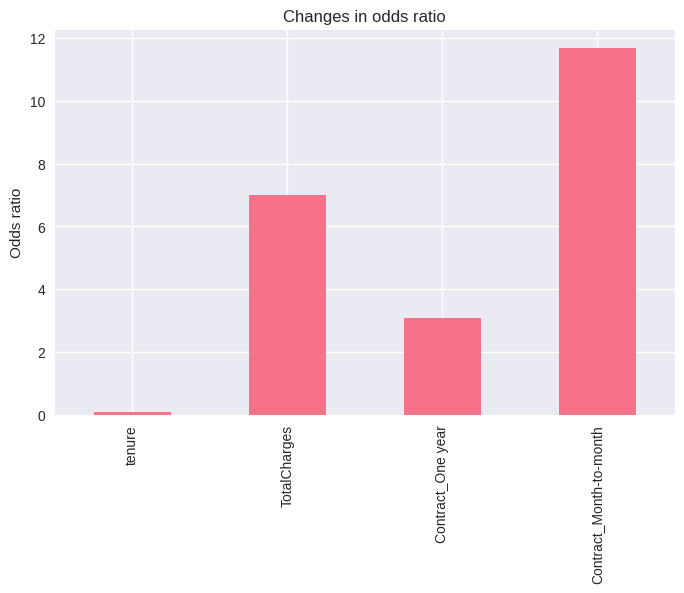

In [ ]:
# Calculate and plot the odds ratio

s = pd.Series(
    np.exp(logit_res.params),
    index=X_train.columns,
)

s.plot.bar(figsize=(8,5))
plt.ylabel("Odds ratio")
plt.title("Changes in odds ratio")
plt.show()

## Coefficient Sign & Direction

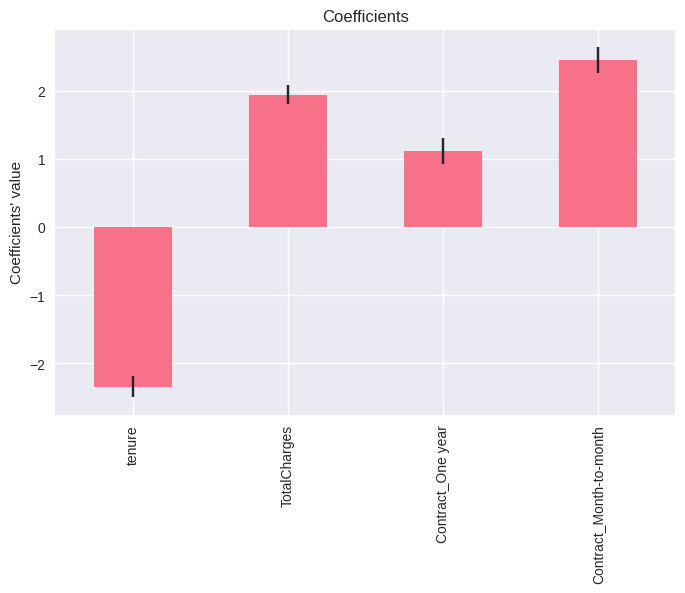

In [ ]:
# Coefficients value

s = pd.Series(
    logit_res.params,
    index=X_train.columns,
)

s.plot.bar(yerr=logit_res.bse, figsize=(8,5))
plt.ylabel("Coefficients' value")
plt.title("Coefficients")
plt.show()

## Coefficient absolute value - feature importance

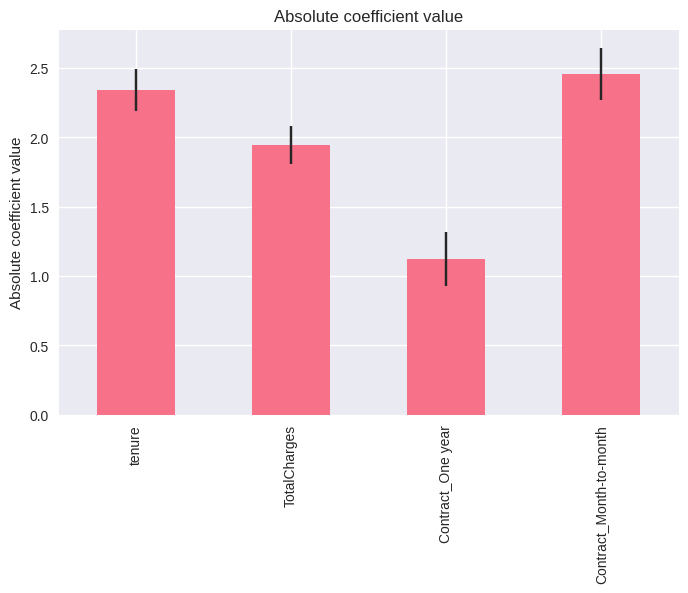

In [ ]:
# Plot mean coefficient and std

s = pd.Series(
    np.abs(logit_res.params),
    index=X_train.columns,
)

s.plot.bar(yerr=logit_res.bse, figsize=(8,5))
plt.ylabel("Absolute coefficient value")
plt.title("Absolute coefficient value")
plt.show()

## z-wald test

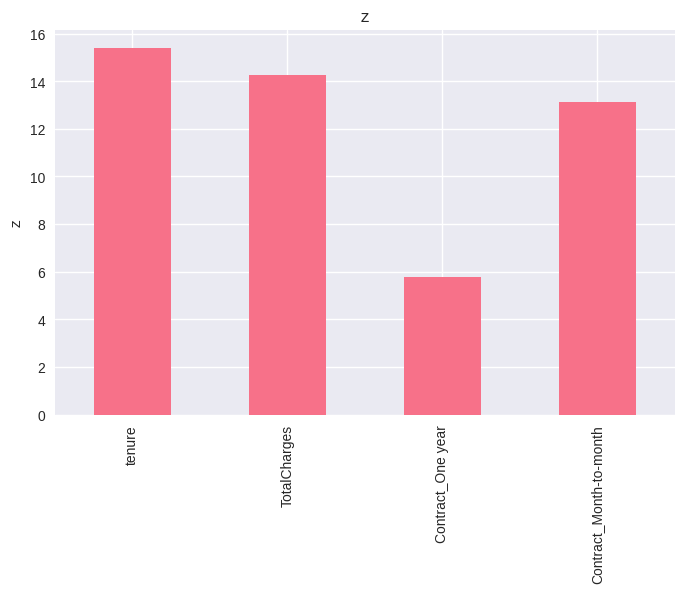

In [ ]:
# estimate and plot z

s = pd.Series(
    np.abs(logit_res.tvalues),
    index=X_train.columns,
)

s.plot.bar(figsize=(8,5))
plt.ylabel("z")
plt.title("z")
plt.show()

---

# Local Interpretability

In [ ]:
# We'll analize the following predictions
test_indices = [2476, 6773, 6116]
X_test_sm.loc[test_indices]

,const,tenure,TotalCharges,Contract_One year,Contract_Month-to-month
2476,1.0,1.168321,-0.341541,0,0
6773,1.0,-0.543522,-0.798916,0,1
6116,1.0,-0.788071,-0.404569,0,1


In [ ]:
# check actual target
y_test.loc[test_indices]

,Churn
2476,0
6773,0
6116,1


In [ ]:
# obtain probability of survival

logit_res.get_prediction(X_test_sm.loc[test_indices]).summary_frame()["predicted"]

,predicted
2476,0.001132
6773,0.230685
6116,0.533957


In [ ]:
obs = 2476

X_test_sm.loc[obs]

,2476
const,1.000000
tenure,1.168321
TotalCharges,-0.341541
Contract_One year,0.000000
Contract_Month-to-month,0.000000


In [ ]:
# log(Odds) contribution of each feature

effect = logit_res.params * X_test.loc[obs]
effect

,0
Contract_Month-to-month,0.000000
Contract_One year,0.000000
TotalCharges,-0.664850
const,NaN
tenure,-2.736708


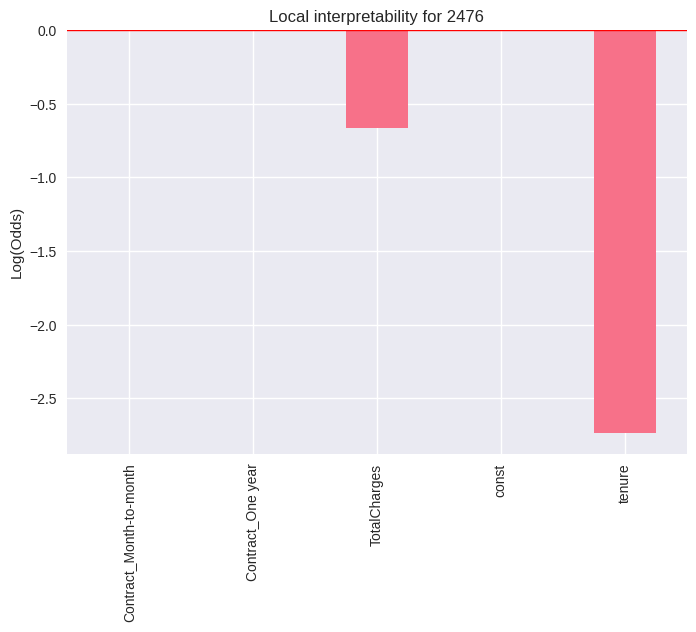

In [ ]:
effect.plot.bar()

plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Log(Odds)")
plt.title(f"Local interpretability for {obs}")
plt.show()

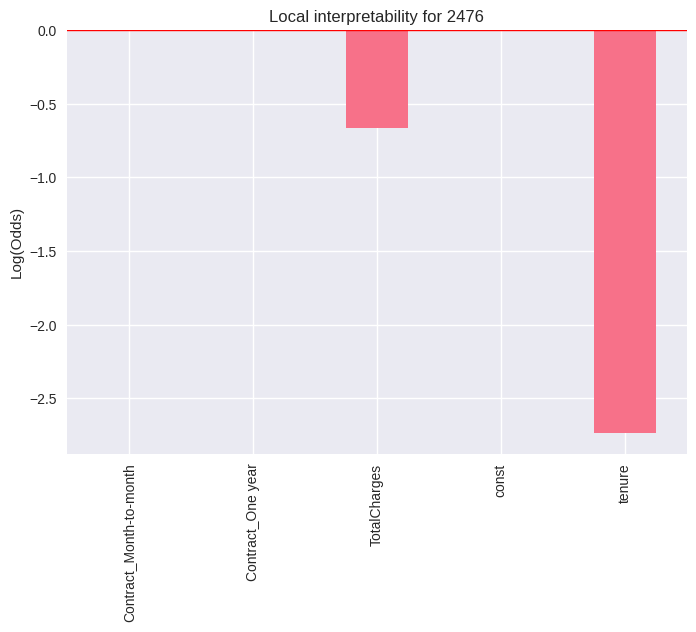

In [ ]:
# log(Odds) contribution of each feature

effect = logit_res.params * X_test.loc[obs]
effect.plot.bar()

plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Log(Odds)")
plt.title(f"Local interpretability for {obs}")
plt.show()